In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/ML Proj/ML_Dataset/ML-Dataset2.zip"

Archive:  /content/drive/MyDrive/ML Proj/ML_Dataset/ML-Dataset2.zip
   creating: ML-Dataset/TestSet/
   creating: ML-Dataset/TestSet/Female/
   creating: ML-Dataset/TestSet/Female/0-6/
  inflating: ML-Dataset/TestSet/Female/0-6/ml-1.jpg  
  inflating: ML-Dataset/TestSet/Female/0-6/ml-17.jpg  
  inflating: ML-Dataset/TestSet/Female/0-6/ml-18.jpg  
  inflating: ML-Dataset/TestSet/Female/0-6/ml-19.jpg  
  inflating: ML-Dataset/TestSet/Female/0-6/ml-2.jpg  
  inflating: ML-Dataset/TestSet/Female/0-6/ml-20.jpg  
  inflating: ML-Dataset/TestSet/Female/0-6/ml-3.jpg  
  inflating: ML-Dataset/TestSet/Female/0-6/ml-4.jpg  
  inflating: ML-Dataset/TestSet/Female/0-6/ml-5.jpg  
  inflating: ML-Dataset/TestSet/Female/0-6/ml-6.jpg  
  inflating: ML-Dataset/TestSet/Female/0-6/ml-8.jpg  
  inflating: ML-Dataset/TestSet/Female/0-6/ml-g_3.2.jpg  
  inflating: ML-Dataset/TestSet/Female/0-6/ml-g_3.3.jpg  
  inflating: ML-Dataset/TestSet/Female/0-6/ml-g_3.4.jpg  
  inflating: ML-Dataset/TestSet/Female/0-6/

In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
train_data = r"/content/ML-Dataset/TrainSet"

In [ ]:
test_data = r"/content/ML-Dataset/TestSet"

In [ ]:
img_width , img_height = 150,150
import tensorflow.keras.backend as kb
if kb.image_data_format() == "channels_first":
  input_shape = (3,img_width , img_height)
else:
  input_shape = (img_width , img_height, 3)

In [ ]:
train_gendata = ImageDataGenerator(rescale = 1. /255, shear_range=0.2, zoom_range= 0.2 , width_shift_range=0.2, height_shift_range= 0.2, horizontal_flip= True)
train_set = train_gendata.flow_from_directory(train_data, target_size = (img_width, img_height),batch_size = 20, class_mode = 'binary', classes = ['Male','Female'])

Found 804 images belonging to 2 classes.


In [ ]:
test_gendata = ImageDataGenerator(rescale = 1. /255)
test_set = test_gendata.flow_from_directory(test_data, target_size = (img_width, img_height),batch_size = 20, class_mode = 'binary', classes = ['Male','Female'])

Found 364 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.regularizers import l2

In [ ]:
#model = Sequential()
#model.add(Conv2D(64, (3,3), input_shape = input_shape))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size = (2,2)))
#model.add(Flatten())
#model.add(Dense(64))
#model.add(Activation('relu'))
#model.add(Dense(1))
#model.add(Activation('sigmoid'))
#model.summary()


model = Sequential()
model.add(Conv2D(16, (3,3), input_shape = input_shape, padding = 'same', kernel_regularizer= l2(0.001)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

#model.add(Dropout(0.01))
model.add(Flatten())
#model.add(Dense(512))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))


In [ ]:
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy',metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
activation (Activation)      (None, 150, 150, 16)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 73, 73, 32)        4640      
_________________________________________________________________
activation_1 (Activation)    (None, 73, 73, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        1

In [ ]:
#model.fit(train_set,steps_per_epoch = 10, epochs = 50, validation_data = test_set, validation_steps = 10)
#history = model.fit(train_set,steps_per_epoch = 30, epochs = 40, validation_data = test_set, validation_steps = 20)
history = model.fit(train_set,steps_per_epoch = 30, epochs = 40, validation_data = test_set, validation_steps = 18)

Epoch 1/40
30/30 [==============================] - 21s 675ms/step - loss: 1.9469 - accuracy: 0.4855 - val_loss: 0.6993 - val_accuracy: 0.4889
Epoch 2/40
30/30 [==============================] - 20s 663ms/step - loss: 0.6999 - accuracy: 0.5120 - val_loss: 0.6979 - val_accuracy: 0.5333
Epoch 3/40
30/30 [==============================] - 20s 651ms/step - loss: 0.6974 - accuracy: 0.5226 - val_loss: 0.6971 - val_accuracy: 0.4944
Epoch 4/40
30/30 [==============================] - 20s 652ms/step - loss: 0.6880 - accuracy: 0.5553 - val_loss: 0.6871 - val_accuracy: 0.5333
Epoch 5/40
30/30 [==============================] - 20s 650ms/step - loss: 0.6888 - accuracy: 0.5585 - val_loss: 0.6903 - val_accuracy: 0.5583
Epoch 6/40
30/30 [==============================] - 20s 647ms/step - loss: 0.6914 - accuracy: 0.5593 - val_loss: 0.6790 - val_accuracy: 0.5639
Epoch 7/40
30/30 [==============================] - 20s 663ms/step - loss: 0.6785 - accuracy: 0.6178 - val_loss: 0.6798 - val_accuracy: 0.5583

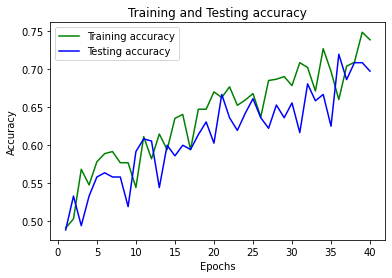

In [ ]:
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']
epochs = range(1,41)
plt.plot(epochs, train_acc, 'g', label='Training accuracy')
plt.plot(epochs, test_acc , 'b', label='Testing accuracy')
plt.title('Training and Testing accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/ML Proj/ML_Dataset/test2.jpg',target_size = (150,150))

In [ ]:
test_image = image.img_to_array(test_image)

In [ ]:
test_image = np.expand_dims(test_image, axis = 0)

In [ ]:
train_set.class_indices

{'Female': 1, 'Male': 0}

In [ ]:
test_set.class_indices

{'Female': 1, 'Male': 0}

In [ ]:
gender = {0:"Male", 1:"Female"}

In [ ]:
result = model.predict(test_image)
print(result)
#print(gender[result[0][0]])

[[1.]]


In [ ]:
import cv2
from google.colab.patches import cv2_imshow

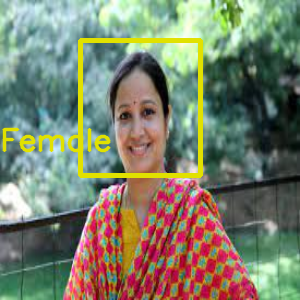

In [ ]:
path = r'/content/drive/MyDrive/ML Proj/ML_Dataset/test2.jpg'
image = cv2.imread(path)
text = gender[result[0][0]]
font = cv2.FONT_HERSHEY_SIMPLEX
org = (00, 150)
color = (0,225,225)
thickness = 2
fontScale = 1
image = cv2.resize(image,(300,300))
image = cv2.rectangle(image, (80,40),(200,175),(0,225,225),3)
image = cv2.putText(image, text, org, font, fontScale, color, thickness, cv2.LINE_AA, False)
cv2_imshow(image)